In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Task 1. Plot hists.

df contains information about the number of reads with each of the 4 nucleotides at different positions (columns A, T, G, C). Plot a histogram of the distribution of these numbers.

In [121]:
url = "https://raw.githubusercontent.com/Serfentum/bf_course/master/14.pandas/train.csv"
df = pd.read_csv(url)

In [122]:
df

,pos,reads_all,matches,mismatches,deletions,insertions,A,C,T,G,A_fraction,T_fraction,G_fraction,C_fraction
0,279,8045,32,7972,46,8,7911.0,54.0,11.0,NaN,0.983503,0.000815,NaN,0.006896
1,280,8045,7995,48,19,9,NaN,16.0,13.0,19.0,NaN,0.001355,0.002392,0.001914
2,281,8045,7983,50,16,5,NaN,24.0,4.0,24.0,NaN,0.000639,0.002875,0.002310
3,282,8049,7510,505,33,65,105.0,11.0,395.0,NaN,0.012750,0.049096,NaN,0.000919
4,283,8042,7786,155,115,62,46.0,NaN,93.0,31.0,0.004960,0.010992,0.003186,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,337,8056,7542,471,58,7,NaN,63.0,47.0,367.0,NaN,0.004584,0.045444,0.007767
59,338,8061,7967,62,29,5,17.0,NaN,26.0,33.0,0.001060,0.002207,0.003992,NaN
60,339,8062,8002,48,14,3,14.0,14.0,33.0,NaN,0.001076,0.002953,NaN,0.001322
61,340,8061,7918,146,16,4,NaN,75.0,43.0,33.0,NaN,0.005307,0.002951,0.008808


<AxesSubplot:xlabel='pos'>

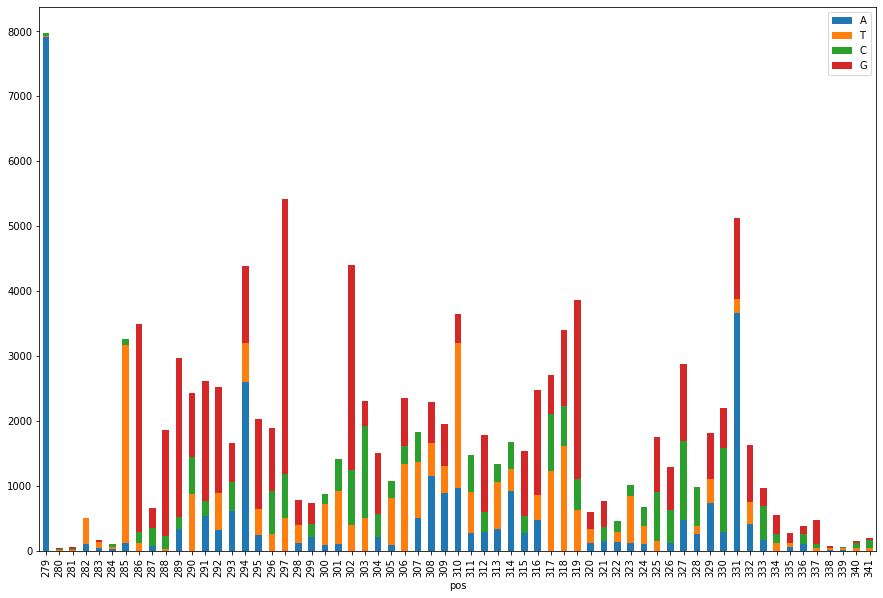

In [123]:
plt.rcParams['figure.figsize'] = 15, 10
df[['pos', 'A', 'T', 'C', 'G']].groupby('pos').sum().plot.bar(stacked=True)